In [170]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 0.0
np.random.seed(42)
X = abs(np.random.normal(loc=100, scale=100, size=400))
epsilon = np.random.normal(loc=0, scale=50, size=400)
y = 2*X + 25 + epsilon

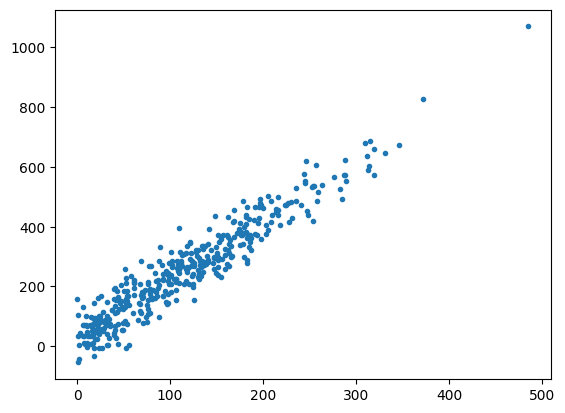

In [171]:
plt.plot(X, y, '.');

<Axes: >

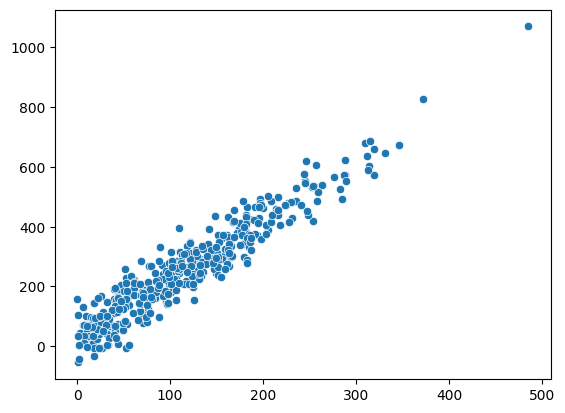

In [172]:
sns.scatterplot(x=X, y=y)

,X,y,epsilon
0,149.671415,244.621448,-79.721383
1,86.173570,167.378389,-29.968751
2,164.768854,354.799893,0.262185
3,252.302986,531.955001,2.349030
4,76.584663,155.666051,-22.503274
...,...,...,...
376,53.082435,183.822512,52.657643
377,71.313453,165.649148,-1.977758
378,235.387237,529.849510,34.075035
379,88.546015,203.507950,1.415919


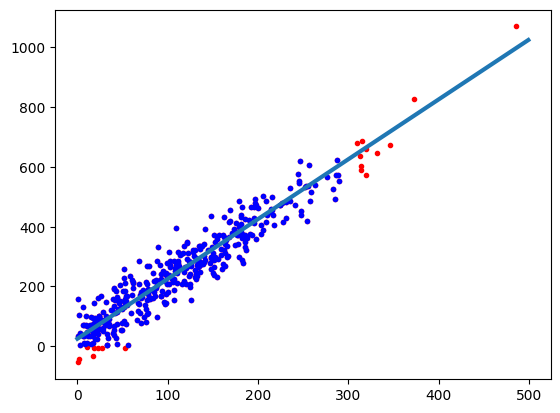

In [173]:
rows_to_remove = []

for i, (x, eps) in enumerate(zip(X, epsilon)):
    cost = x * 2 + eps + 25
    if cost < 0 or x > 300:
        rows_to_remove.append(i)

y_clean = np.delete(y, rows_to_remove, 0)
X_clean = np.delete(X, rows_to_remove, 0)
epsilon_clean = np.delete(epsilon, rows_to_remove, 0)

plt.plot(X, y, '.', color="red")
plt.plot(X_clean, y_clean, '.', color="blue")

xs = np.linspace(0, 500, 500)
ground_truth = 2*xs + 25
plt.plot(ground_truth, linewidth=3)

df = pd.DataFrame({'X': X_clean.tolist(), 'y':y_clean.tolist(), 'epsilon':epsilon_clean.tolist()})
y_clean.shape
df

In [174]:
# 0.1
import random

def train_test_split(
    X: pd.DataFrame,
    y: pd.DataFrame,
    train_fraction: float = 0.7,
    random_state: int = 42,
    replace: bool = False,
) -> tuple:

    np.random.seed(random_state)
    indices = random.sample(range(0, X.shape[0]), int(train_fraction*X.shape[0]))
    X_train = np.array(X.iloc[indices])
    y_train = np.array(y.iloc[indices])
    X_test = np.array(X.drop(index=indices))
    y_test = np.array(y.drop(index=indices))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X = df["X"], y = df["y"])

In [175]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [176]:
beta_hat

array([29.66027243,  1.96962182])

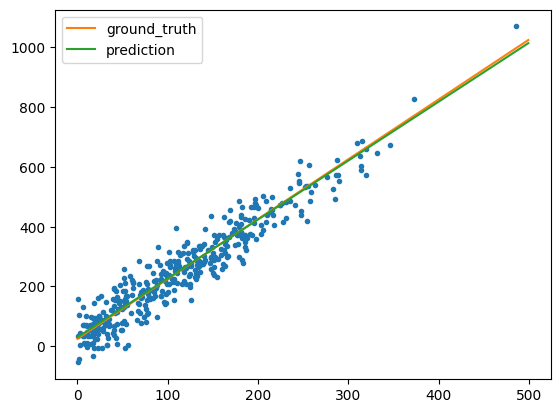

In [183]:
fig, ax = plt.figure(), plt.axes()
ax.plot(X, y, '.')
ax.plot(ground_truth, label="ground_truth")
beta_hat_line = beta_hat[0] + beta_hat[1]*xs
ax.plot(beta_hat_line, label="prediction")
ax.legend()


In [ ]:
# 0.4

